## NIPS 2014 Late Review Observations

### Corinna Cortes and Neil D. Lawrence

This notebook analyzes the reduction in reviewer confidence between reviewers that submit their reviews early and those that arrive late. The reviews are first loaded in from files Corinna and Neil saved and stored in a pickle. The function for doing that is `nips.load_review_history`.


In [5]:
%matplotlib inline
import cmtutils
import nipsy

import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

reviews = nipsy.load_review_history()

## Review Submission Times

All reviews are now in pandas data frame called reviews, they are ready for processing. First of all, let's take a look at when the reviews were submitted. The function `nipsy.reviews_before` gives a snapshot of the reviews as they stood at a particular date. So we simply create a data series across the data range of reviews (`nipsy.review_data_range`) that shows the counts.

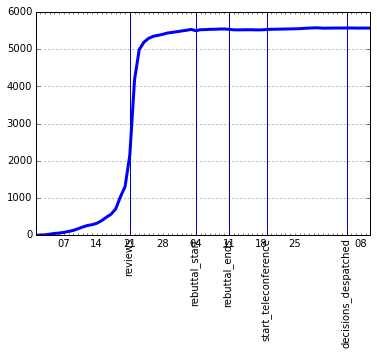

In [19]:
review_count = pd.Series(index=nipsy.review_date_range)
for date in nipsy.review_date_range:
    review_count.loc[date] = nipsy.reviews_before(reviews, date).Quality.shape[0]
ax = review_count.plot(linewidth=3)
nipsy.plot_deadlines(ax)


We worked hard to try and ensure that all papers had three reviews before the start of the rebuttal. This next plot shows the numbers of papers that had less than three reviews across the review period.

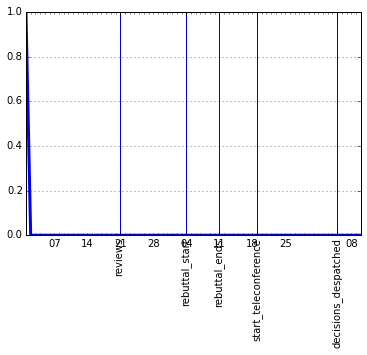

In [7]:
count = pd.Series(index=nipsy.review_date_range)
for date in nipsy.review_date_range:
    count[date] = (review_count[date]<3).sum()
ax = count.plot(linewidth=3)
nipsy.plot_deadlines(ax)
plt.savefig('../tex/diagrams/papers_short_reviews.pdf')

## Review Confidence

Now we will check the confidence of reviews as the come in over time. We've written a small helper function that looks in a four day window around each time point and summarises the associated score (in the first case, confidence, `Conf`) with its across the four day window and 95% confidence intervals computed from the standard error of the mean estimate.

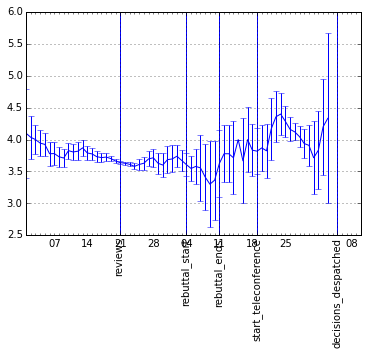

In [16]:
nipsy.evolving_statistic(reviews, 'Conf',window=4)
plt.savefig('../tex/diagrams/review_confidence_time.pdf')

It looks like there might be a reduction in confidence as we pass the review deadline on 21st July, but is the difference in confidence for the reviews that came in later really significant? 

We now simplify the question by looking at the average confidence for reviews that arrived before 21st July (the reviewing deadline) and reviews that arrived after the 21st July (i.e. those that were chased or were allocated late) but before the rebuttal period started (4th August). Below we select these two groups and estimate the estimate of the mean confidence with (again with error bars).

On time reviewers Conf: 3.68190521781 +/- 0.0259070382941
Chased reviewers Conf: 3.59206798867 +/- 0.044199007254
t-statistic is 3.49282213703 and p-value is 0.000481645383313


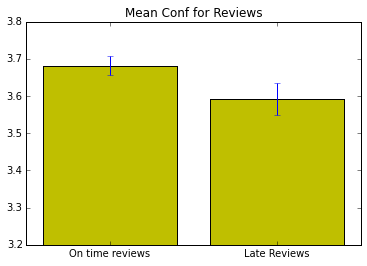

In [9]:
nipsy.late_early_statistic(reviews, 'Conf', (3.2, 3.8))

plt.savefig('../tex/diagrams/review_confidence_pvalue.pdf')


3681    2756
327     2489
399     2106
1134    1071
1713    2412
2815    3278
3111     612
4282    3719
5020    2036
5244     398
320     1112
2352    3122
2058    2325
2163    1470
3092    3125
...
5514    2263
5515    1146
5516    5715
5517    1329
5518    2275
5519    2217
5520     663
5521    2505
5522     499
5523    1333
5524    1386
5525    1680
5526     739
5527    3505
5528    1147
Name: Comments, Length: 8079, dtype: int64

So it looks like there is a small but significant difference between the average confidence of the submitted reviews before and after the deadline, the statistical significance is confirmed with a $t$-test with a $p$-value at 0.048%. The magnitude of the difference is small (about 0.1) but may indicate a tendency for later reviewers to be a little more rushed.

# Quality Score

This begs the question, is there an effect on the other scores of their reviews which cover 'quality' and 'impact'. Quality of papers is scored on a 10 point scale with a recommendation of 6 being accept and We can form a similar plot for quality as follows.

On time reviewers Quality: 5.19291527046 +/- 0.0549975180108
Chased reviewers Quality: 5.40864022663 +/- 0.0923206735776
t-statistic is -3.96670162824 and p-value is 7.37857810446e-05


/Users/neil/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


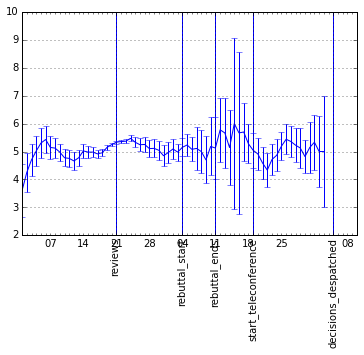

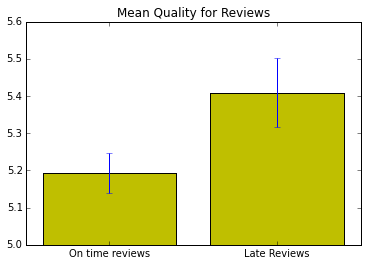

In [10]:
nipsy.evolving_statistic(reviews, 'Quality', window=4)
plt.savefig('../tex/diagrams/review_quality_time.pdf')
nipsy.late_early_statistic(reviews, 'Quality', (5.0, 5.6))
plt.savefig('../tex/diagrams/review_quality_pvalue.pdf')


There is another statistically significant difference between perceived quality scores after the reviewing deadline than before. On average reviewers tend to be more generous in their quality perceptions when the review is late. The $p$-value is computed as 0.007%. We can also check if there is a similar on the impact score. The impact score was introduced by Ghahramani and Welling in an effort to get reviewers not just to think about the technical side of the paper, but whether it is driving the field forward. The score is binary, with 1 being for a paper that is unlikey to have high impact and 2 being for a paper that is likely to have a high impact.

On time reviewers Impact: 1.25155576831 +/- 0.0134274833035
Chased reviewers Impact: 1.2769121813 +/- 0.0238250072689
t-statistic is -1.88301300606 and p-value is 0.0597505035612


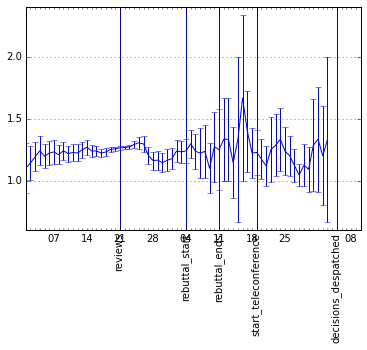

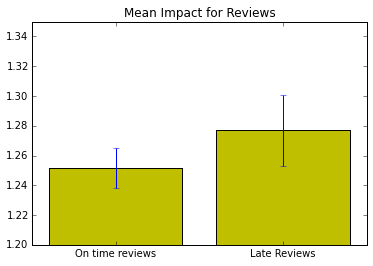

In [21]:
nipsy.evolving_statistic(reviews, 'Impact', window=4)
plt.savefig('../tex/diagrams/review_impact_time.pdf')
nipsy.late_early_statistic(reviews, 'Impact', (1.2, 1.35))
plt.savefig('../tex/diagrams/review_impact_pvalue.pdf')

We find the difference is not quite statistically significant for the impact score ($p$-value of 5.9%), but if anything there is a trend to have slightly higher impacts for later reviews.


# Review Length

A final potential indicator of review quality is the length of the reviews, we can check if there is a difference between the combined length of the review summary and the main body comments for late and early reviews. 

On time reviewers length: 2422.32168502 +/- 42.5299752251
Chased reviewers length: 2312.2733711 +/- 71.6214603882
t-statistic is 2.61469375985 and p-value is 0.00895472981848


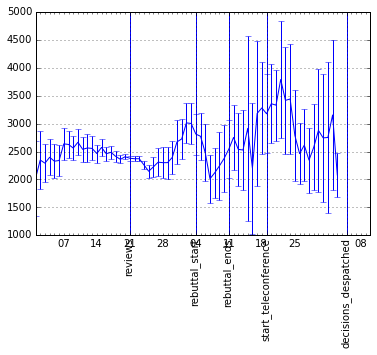

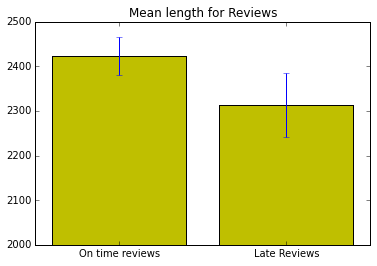

In [18]:
reviews['length'] = reviews['Comments'].apply(len) + reviews['Summary'].apply(len)
nipsy.evolving_statistic(reviews, 'length', window=4)
plt.savefig('../tex/diagrams/review_length_time.pdf')
nipsy.late_early_statistic(reviews, 'length', (2000, 2500))
plt.savefig('../tex/diagrams/review_length_pvalue.pdf')

Once again we find a small but statitically significant difference, here, as we might expect late reviews are shorter than those submitted on time, by about 100 words in a 2,400 word review.

## Summary

In summary we find that late reviews are on average less confident and shorter, but rate papers as higher quality and perhaps as higher impact. Each of the effects is small (around 5%) but overall a picture emerges of a different category of review from those that delay their assesment.